# Fish AI

Real time fish counter and identification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import cv2
from darkflow.net.build import TFNet

# %config InlineBackend.figure_format = 'svg'

/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [3]:
options = {
    'model': 'cfg/tiny-yolo-voc-5c.cfg',
#     'load': 'bin/tiny-yolo-voc.weights',
    'load': 400,
    'thresh': 0.2,
    'gpu': 0
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-5c.cfg
Loading None ...
Finished in 4.553794860839844e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 2

In [28]:
!ls test/images/*.jpg

test/images/big_eye_snapper_1_0145.jpg
test/images/big_eye_snapper_1_0146.jpg
test/images/big_eye_snapper_1_0147.jpg
test/images/big_eye_snapper_1_0148.jpg
test/images/big_eye_snapper_1_0149.jpg
test/images/big_eye_snapper_1_0150.jpg
test/images/big_eye_snapper_1_0151.jpg
test/images/big_eye_snapper_1_0152.jpg
test/images/big_eye_snapper_1_0153.jpg
test/images/big_eye_snapper_1_0154.jpg
test/images/big_eye_snapper_1_0155.jpg
test/images/big_eye_snapper_1_0156.jpg
test/images/big_eye_snapper_1_0157.jpg
test/images/big_eye_snapper_1_0158.jpg
test/images/big_eye_snapper_1_0159.jpg
test/images/big_eye_snapper_1_0160.jpg
test/images/big_eye_snapper_1_0161.jpg
test/images/big_eye_snapper_1_0162.jpg
test/images/big_eye_snapper_1_0163.jpg
test/images/big_eye_snapper_1_0164.jpg
test/images/big_eye_snapper_1_0165.jpg
test/images/big_eye_snapper_1_0166.jpg
test/images/big_eye_snapper_1_0167.jpg
test/images/big_eye_snapper_1_0168.jpg
test/images/big_eye_snapper_1_0169.jpg
test/images/big_eye_snapp

[]

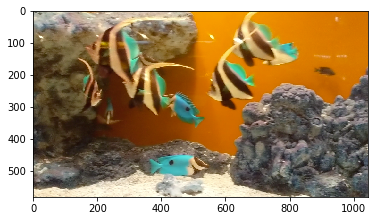

In [46]:
img = cv2.imread('test/images/fish_test.png', cv2.IMREAD_COLOR)
plt.imshow(img)
result = tfnet.return_predict(img)
result

In [44]:
tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']

tl, br, label

IndexError: list index out of range

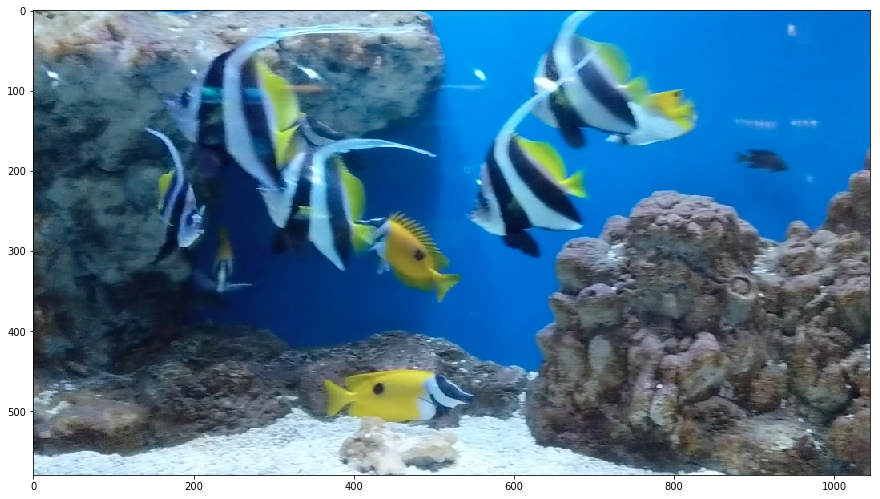

In [45]:
img2 = img

for i in range(len(result)):
    tl = (result[i]['topleft']['x'], result[i]['topleft']['y'])
    br = (result[i]['bottomright']['x'], result[i]['bottomright']['y'])
    label = result[i]['label']
    
    img2 = cv2.rectangle(img2, tl, br, (0, 255, 0), 2)
    
#     img2 = cv2.putText(img2, label, tl, fontFace = cv2.FONT_HERSHEY_COMPLEX, 
#                    fontScale = 0.1, color = (0, 255, 0), thickness=8)

img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(img2)
plt.show()